# Results: Annual Maximum, Daily Precipitation Depth

Compare the simulated maximum daily precipitation depth on an annual basis to the datasets

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from copy import deepcopy

In [3]:
IN_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Process_Results'
SIM_ROOT = "DC_WGMN1"
AMAX_ROOT = "%s_%s_PreAnnMax_npa.pickle"
DP_DATA_IN = r'C:\Users\nmartin\Documents\CC_IRD\Events\PRISM_DP_AnnMaxDailyPrecip.pickle'
P1_LOCA_IN = r'C:\Users\nmartin\Documents\CC_IRD\Events\LOCA_P1_AnnMaxDailyPrecip.pickle'
P2_LOCA_IN = r'C:\Users\nmartin\Documents\CC_IRD\Events\LOCA_P2_AnnMaxDailyPrecip.pickle'
P3_LOCA_IN = r'C:\Users\nmartin\Documents\CC_IRD\Events\LOCA_P3_AnnMaxDailyPrecip.pickle'

In [4]:
OUT_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Events'

## Load

### Data and LOCA

In [5]:
with open( DP_DATA_IN, 'rb' ) as IP:
    npPAnn = pickle.load( IP )
npPAnn.max()

85.4517607183314

In [6]:
with open( P1_LOCA_IN, 'rb' ) as IP:
    LOCA_P1 = pickle.load( IP )
LOCA_P1.max()

131.5483300437349

In [7]:
with open( P2_LOCA_IN, 'rb' ) as IP:
    LOCA_P2 = pickle.load( IP )
LOCA_P2.max()

143.28409825331778

In [8]:
with open( P3_LOCA_IN, 'rb' ) as IP:
    LOCA_P3 = pickle.load( IP )
LOCA_P3.max()

157.31418039071772

### Simulation Results

In [9]:
InFile = os.path.normpath( os.path.join( IN_DIR, AMAX_ROOT % ( "DP", SIM_ROOT ) ) )
with open( InFile, 'rb' ) as IP:
    DP_SimAr = pickle.load( IP )
DP_SimAr.max()

200.68174274265766

In [10]:
InFile = os.path.normpath( os.path.join( IN_DIR, AMAX_ROOT % ( "P1", SIM_ROOT ) ) )
with open( InFile, 'rb' ) as IP:
    P1_SimAr = pickle.load( IP )
P1_SimAr.max()

199.69799014925957

In [11]:
InFile = os.path.normpath( os.path.join( IN_DIR, AMAX_ROOT % ( "P2", SIM_ROOT ) ) )
with open( InFile, 'rb' ) as IP:
    P2_SimAr = pickle.load( IP )
P2_SimAr.max()

192.6997478455305

In [12]:
InFile = os.path.normpath( os.path.join( IN_DIR, AMAX_ROOT % ( "P3", SIM_ROOT ) ) )
with open( InFile, 'rb' ) as IP:
    P3_SimAr = pickle.load( IP )
P3_SimAr.max()

205.69794948399067

## Make Plotting DataFrames

In [13]:
NumPRISM = npPAnn.shape[0]
NumPRISM

30

In [14]:
NumP1_LOCA = LOCA_P1.shape[0]
NumP1_LOCA

1920

In [15]:
NumP2_LOCA = LOCA_P2.shape[0]
NumP2_LOCA

1920

In [16]:
NumP3_LOCA = LOCA_P3.shape[0]
NumP3_LOCA

1856

In [17]:
NumDP_Sim = DP_SimAr.shape[0]
NumDP_Sim

310000

In [18]:
NumP1_Sim = P1_SimAr.shape[0]
NumP1_Sim

300000

In [19]:
NumP2_Sim = P2_SimAr.shape[0]
NumP2_Sim

300000

In [20]:
NumP3_Sim = P3_SimAr.shape[0]
NumP3_Sim

300000

In [21]:
PRISM_Labels = [ "PRISM" for x in range( NumPRISM ) ]
LOCA_P1_Labels = [ "LOCA" for x in range( NumP1_LOCA ) ]
LOCA_P2_Labels = [ "LOCA" for x in range( NumP2_LOCA ) ]
LOCA_P3_Labels = [ "LOCA" for x in range( NumP3_LOCA ) ]
SimDP_Labels = [ "Simulated" for x in range( NumDP_Sim ) ]
SimP1_Labels = [ "Simulated" for x in range( NumP1_Sim ) ]
SimP2_Labels = [ "Simulated" for x in range( NumP2_Sim ) ]
SimP3_Labels = [ "Simulated" for x in range( NumP3_Sim ) ]

In [22]:
AllLabels = deepcopy( PRISM_Labels )
AllLabels.extend( SimDP_Labels)
AllLabels.extend( LOCA_P1_Labels )
AllLabels.extend( SimP1_Labels )
AllLabels.extend( LOCA_P2_Labels )
AllLabels.extend( SimP2_Labels )
AllLabels.extend( LOCA_P3_Labels )
AllLabels.extend( SimP3_Labels )
DPTotLen = len( AllLabels )
DPTotLen

1215726

In [23]:
Interval_PRISM_DP = [ "1981-2010" for x in range( NumPRISM ) ]
Interval_LOCA_P1 = [ "2011-2040" for x in range( NumP1_LOCA ) ] 
Interval_LOCA_P2 = [ "2041-2070" for x in range( NumP2_LOCA ) ] 
Interval_LOCA_P3 = [ "2071-2100" for x in range( NumP3_LOCA ) ] 
Interval_SIM_DP = [ "1981-2010" for x in range( NumDP_Sim ) ]
Interval_SIM_P1 = [ "2011-2040" for x in range( NumP1_Sim) ] 
Interval_SIM_P2 = [ "2041-2070" for x in range( NumP2_Sim ) ] 
Interval_SIM_P3 = [ "2071-2100" for x in range( NumP3_Sim ) ]

In [24]:
AllIntervals = deepcopy( Interval_PRISM_DP )
AllIntervals.extend( Interval_SIM_DP )
AllIntervals.extend( Interval_LOCA_P1 )
AllIntervals.extend( Interval_SIM_P1 )
AllIntervals.extend( Interval_LOCA_P2 )
AllIntervals.extend( Interval_SIM_P2 )
AllIntervals.extend( Interval_LOCA_P3 )
AllIntervals.extend( Interval_SIM_P3 )

In [25]:
AllValues = np.concatenate( [ npPAnn, DP_SimAr, LOCA_P1, P1_SimAr, LOCA_P2, P2_SimAr, LOCA_P3, P3_SimAr ], axis=0 )
AllValues.shape

(1215726,)

In [26]:
DataDict = { "Interval" :AllIntervals,
             "DLabel" : AllLabels,
             "AnnMax" : AllValues, }
DPDF = pd.DataFrame( data=DataDict )

Now save this DataFrame in case want to used it later for plotting

In [27]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_AnnMaxPre_All.pickle" % SIM_ROOT ) )
DPDF.to_pickle( OutFiler, compression='zip', protocol=-1 )

## Plots

In [28]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [29]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_AnnMax_%s_BW.svg" % SIM_ROOT) )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Results_AnnMax_DC_WGMN1_BW.svg'

In [30]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_AnnMax_%s_BW.png" % SIM_ROOT) )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Results_AnnMax_DC_WGMN1_BW.png'

In [31]:
preTicks = [ 0.0 + (x *50.0) for x in range(7) ]

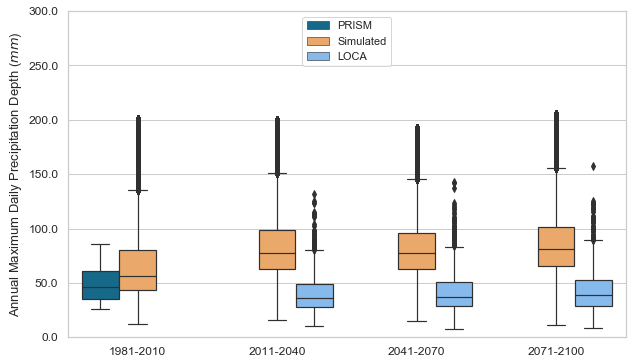

In [32]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
g = sns.boxplot( x="Interval", y="AnnMax", hue="DLabel",
                 dodge=True, linewidth=1.2, orient="v",
                palette={ "PRISM" : "xkcd:ocean blue", 
                          "LOCA" : "xkcd:sky blue",
                          "Simulated" : "xkcd:pale orange", },
                data=DPDF, ax=ax11 )
g.legend(prop=dict(size=12))
g.legend(loc="upper center")
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=13 )
g.set_ylabel('Annual Maximum Daily Precipitation Depth ($mm$)', fontsize=13)
g.set_ylim( (0.0, 300.0))
g.tick_params(axis='both', which='major', labelsize=12)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )